# Machine Learning of AirBNB Data
### importing of libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score

from collections import Counter


from sklearn import neighbors
from math import sqrt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


air_data = pd.read_csv("listings_june.csv")
zhdf = pd.read_csv("listings_june.csv")
air_data.shape

(4238, 74)

# Random Forest ML for Ratings

## Adding of variables and cleaning of dataframe

In [23]:
amenities = zhdf[['price','review_scores_rating','amenities']]

amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
amenities['amenities'] = amenities['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')
amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)

amenities.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_18048/3363704013.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\limzi\AppData\Local\Temp/ipykernel_18048/3363704013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\limzi\AppData\Local\Temp/ipykernel_18048/3363704013.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single

,price,review_scores_rating,amenities,amenities_count
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21


In [24]:
a = amenities['amenities'].str.split(', ', expand=True).stack().value_counts()

#count number of amenities and puts them in a dataframe
amenitycount_df = a.rename_axis('amenities').reset_index(name='count')

#takes top x amenities and puts them in a series
amenity_list_top = amenitycount_df['amenities'].head(15)
print(amenity_list_top)

0     Long term stays allowed
1            Air conditioning
2                        Wifi
3                  Essentials
4                      Washer
5                     Hangers
6                     Kitchen
7                        Iron
8         Dedicated workspace
9                  Hair dryer
10                      Dryer
11                  Hot water
12                    Shampoo
13               Refrigerator
14                   Elevator
Name: amenities, dtype: object


In [25]:
#check amenity list against amenity column to see if it exists, then
#then append column to dataframe

for i in amenity_list_top:
    amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))
    
amenities.info()

C:\Users\limzi\AppData\Local\Temp/ipykernel_18048/1060777134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        4238 non-null   float64
 1   review_scores_rating         2479 non-null   float64
 2   amenities                    4238 non-null   object 
 3   amenities_count              4238 non-null   int64  
 4   has_long term stays allowed  4238 non-null   bool   
 5   has_air conditioning         4238 non-null   bool   
 6   has_wifi                     4238 non-null   bool   
 7   has_essentials               4238 non-null   bool   
 8   has_washer                   4238 non-null   bool   
 9   has_hangers                  4238 non-null   bool   
 10  has_kitchen                  4238 non-null   bool   
 11  has_iron                     4238 non-null   bool   
 12  has_dedicated workspace      4238 non-null   bool   
 13  has_hair dryer    

## Append "high rating" column (if rating >= 4.7) to amenities

In [26]:
def value_label(row):
    if row['review_scores_rating'] >= 4.7:
        return True
    else:
        return False

amenities['high_rating'] = amenities.apply(lambda row: value_label(row), axis=1)
amenities.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_18048/1164290711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['high_rating'] = amenities.apply(lambda row: value_label(row), axis=1)


,price,review_scores_rating,amenities,amenities_count,has_long term stays allowed,has_air conditioning,has_wifi,has_essentials,has_washer,has_hangers,has_kitchen,has_iron,has_dedicated workspace,has_hair dryer,has_dryer,has_hot water,has_shampoo,has_refrigerator,has_elevator,high_rating
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True,True
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True,False
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True,True
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True,False
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True,False


In [27]:
amenities.shape

(4238, 20)

## Train test split for Random Forest ML 

In [28]:
amenities = amenities.dropna(subset=['review_scores_rating'])
X2 = amenities.drop(columns=['review_scores_rating', 'amenities', 'high_rating'], axis=1)
y2 = amenities['high_rating']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 5)

#Check number of records
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 4190
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        2479 non-null   float64
 1   amenities_count              2479 non-null   int64  
 2   has_long term stays allowed  2479 non-null   bool   
 3   has_air conditioning         2479 non-null   bool   
 4   has_wifi                     2479 non-null   bool   
 5   has_essentials               2479 non-null   bool   
 6   has_washer                   2479 non-null   bool   
 7   has_hangers                  2479 non-null   bool   
 8   has_kitchen                  2479 non-null   bool   
 9   has_iron                     2479 non-null   bool   
 10  has_dedicated workspace      2479 non-null   bool   
 11  has_hair dryer               2479 non-null   bool   
 12  has_dryer                    2479 non-null   bool   
 13  has_hot water     

In [29]:
#Check number of records
y2.head()

0     True
1    False
2     True
3    False
4    False
Name: high_rating, dtype: bool

In [30]:
clf = RandomForestClassifier(n_estimators = 8000, random_state = 10)
clf.fit(X2_train, y2_train)


RandomForestClassifier(n_estimators=8000, random_state=10)

## Predict y test values with x test values

In [31]:
y2_pred = clf.predict(X2_test)
test2_df = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
test2_df

,Actual,Predicted
2903,False,False
3139,False,False
842,False,True
2047,True,True
1712,True,True
...,...,...
1521,False,True
1516,False,False
441,False,True
252,False,False


## Accuracy of Random Forest model on selected variables

In [32]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
#print('Train R^2:', regressor.score(X2_train, y2_train))
#print('Test R^2:', regressor.score(X2_test, y2_test))
accuracy = accuracy_score(y2_test, y2_pred) * 100

conf = confusion_matrix(y2_test, y2_pred)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(conf)

Accuracy:  55.77956989247311
Confusion Matrix: 
[[169 160]
 [169 246]]


In [33]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

       False       0.50      0.51      0.51       329
        True       0.61      0.59      0.60       415

    accuracy                           0.56       744
   macro avg       0.55      0.55      0.55       744
weighted avg       0.56      0.56      0.56       744



<AxesSubplot:>

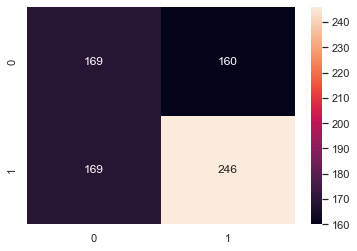

In [34]:
CM2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(data = CM2, annot=True, fmt=".0f")

In [35]:
TP = CM2[1][1]
FN = CM2[1][0]
FP = CM2[0][1]
TN = CM2[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is: ",TPR)
print("False Positive Rate is: ",FNR)

True Positive Rate is:  0.5927710843373494
False Positive Rate is:  0.4072289156626506


## Visualisation of one tree from the forest

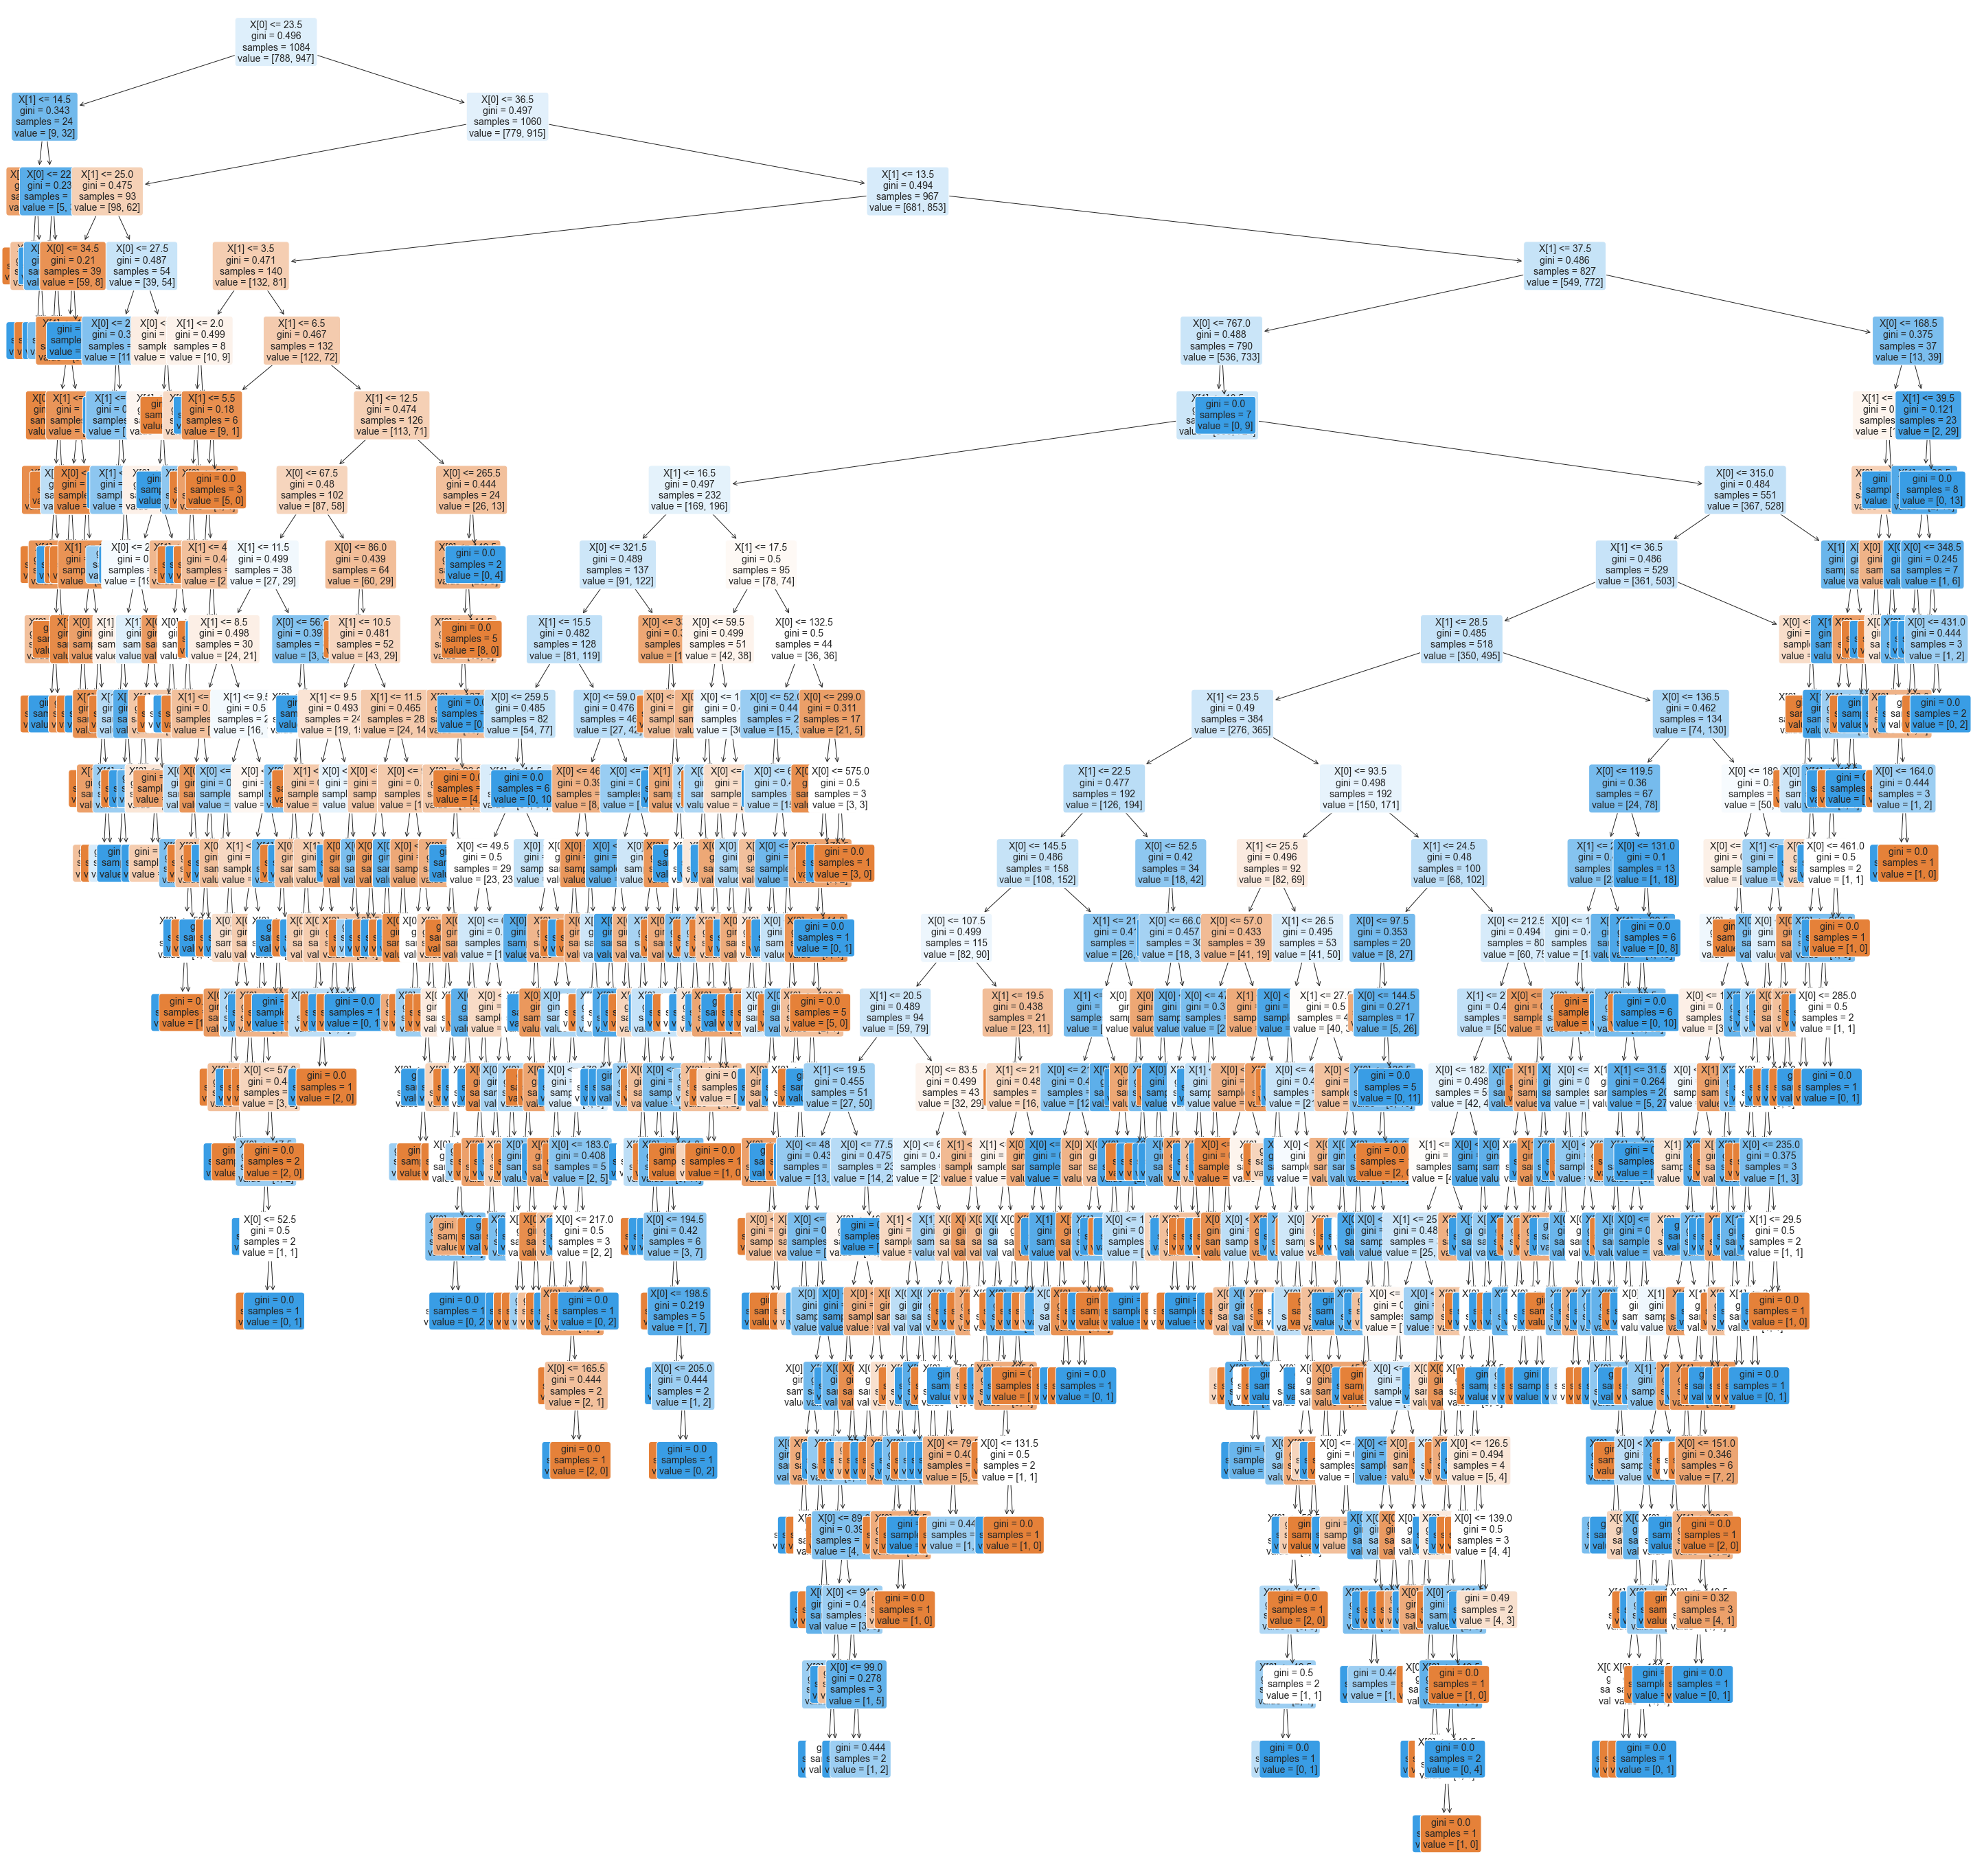

In [36]:
#Pull out one tree from the forest
Tree = clf.estimators_[5]
plt.figure(figsize=(50,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# Support Vector Machine ML

In [37]:
X2 = amenities.drop(columns=['review_scores_rating', 'amenities', 'high_rating'], axis=1)
y2 = amenities['high_rating']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 15)

X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 4190
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        2479 non-null   float64
 1   amenities_count              2479 non-null   int64  
 2   has_long term stays allowed  2479 non-null   bool   
 3   has_air conditioning         2479 non-null   bool   
 4   has_wifi                     2479 non-null   bool   
 5   has_essentials               2479 non-null   bool   
 6   has_washer                   2479 non-null   bool   
 7   has_hangers                  2479 non-null   bool   
 8   has_kitchen                  2479 non-null   bool   
 9   has_iron                     2479 non-null   bool   
 10  has_dedicated workspace      2479 non-null   bool   
 11  has_hair dryer               2479 non-null   bool   
 12  has_dryer                    2479 non-null   bool   
 13  has_hot water     

In [38]:
y2.head()

0     True
1    False
2     True
3    False
4    False
Name: high_rating, dtype: bool

## Visualising the linearly separable data

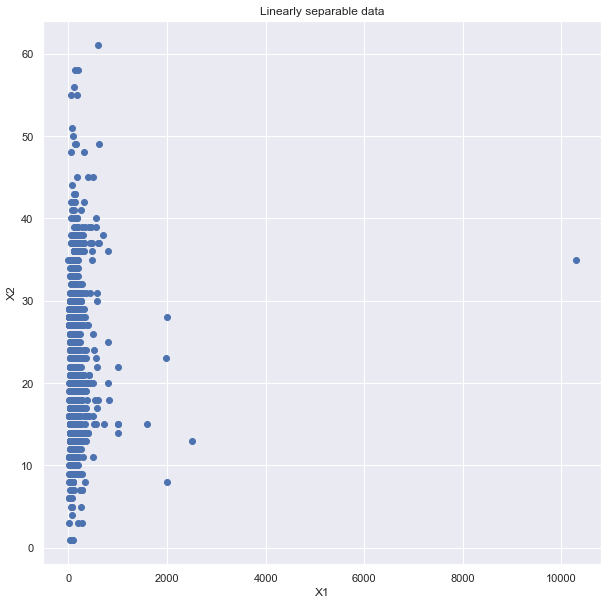

In [39]:
X2_train_values = X2_train.values
# Generate scatter plot for training data
plt.figure(figsize=(10,10))
plt.scatter(X2_train_values[:,0], X2_train_values[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## SVM ML

In [40]:
from sklearn import svm
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X2_train, y2_train)
predicted2_vals = clf.predict(X2_test)

In [41]:
predicted2_vals

array([ True,  True, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True,

In [42]:
print(classification_report(y2_test, predicted2_vals))

              precision    recall  f1-score   support

       False       0.60      0.39      0.47       341
        True       0.60      0.77      0.68       403

    accuracy                           0.60       744
   macro avg       0.60      0.58      0.58       744
weighted avg       0.60      0.60      0.58       744



In [43]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[   1    8    9 ... 1732 1733 1734]


In [44]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[789 789]


## Visualising support vectors with the linearly separable data

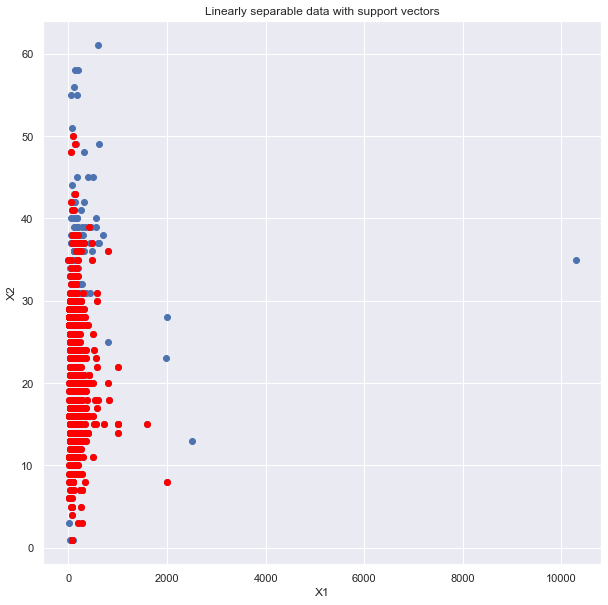

In [45]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.figure(figsize=(10,10))
plt.scatter(X2_train_values[:,0], X2_train_values[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Logistic Regression

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X2_train, y2_train)

y2_pred = logreg.predict(X2_test)
y2_pred

array([ True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,

 ## Accuracy of Logistic Regression

In [47]:
accuracy = accuracy_score(y2_test, y2_pred) * 100

conf = confusion_matrix(y2_test, y2_pred)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(conf)

Accuracy:  59.81182795698925
Confusion Matrix: 
[[144 197]
 [102 301]]


In [48]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

       False       0.59      0.42      0.49       341
        True       0.60      0.75      0.67       403

    accuracy                           0.60       744
   macro avg       0.59      0.58      0.58       744
weighted avg       0.60      0.60      0.59       744



<AxesSubplot:>

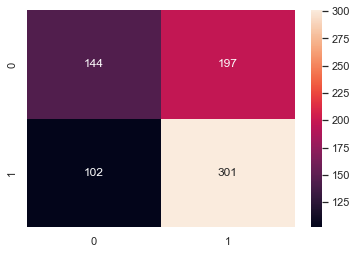

In [49]:
CM2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(data = CM2, annot=True, fmt=".0f")

In [50]:
TP = CM2[1][1]
FN = CM2[1][0]
FP = CM2[0][1]
TN = CM2[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is: ",TPR)
print("False Positive Rate is: ",FNR)

True Positive Rate is:  0.7468982630272953
False Positive Rate is:  0.2531017369727047
